In [2]:
import pandas as pd

monsters = pd.read_csv("monsters.csv",index_col="sifra", encoding="utf-8")
spells_and_traps = pd.read_csv("spell_trap.csv", index_col="sifra")

# Predstavitev podatkov

Za lažjo interpretacijo in večje razumevanje si lahko ogledate [pravila igre](https://www.yugioh-card.com/en/rulebook/).

Spodnji graf prikazuje število pošasti po levelih.

<Axes: xlabel='level', ylabel='ATK'>

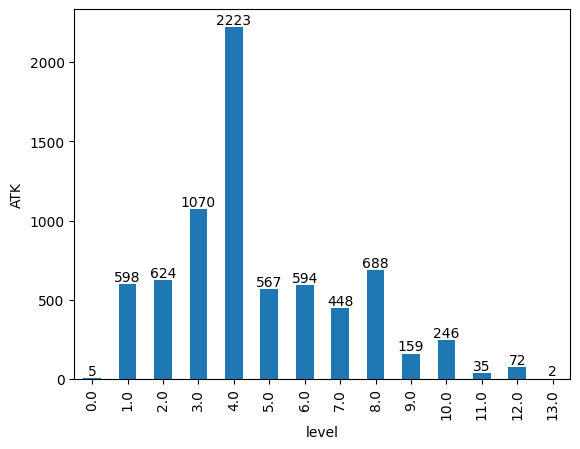

In [3]:
graf = monsters.groupby("level")["ime"].count().plot.bar(ylabel="ATK")
labels = graf.bar_label(graf.containers[0])
graf

Tu je 15 pošasti z najvišjim ATK. ATK (attack) kaže na ofenzivno moč pošasti. Govoriti o najnižjih vrednostih je nesmiselno, saj imajo mnoge pošasti ATK ali DEF 0.

In [4]:
napadalni = monsters[["ime", "ATK", "DEF", "level", "summon condition", "tipi"]].sort_values("ATK", ascending=False)
napadalni.head(15)

,ime,ATK,DEF,level,summon condition,tipi
sifra,,,,,,
58931850,Dragon Master Lords,5000.0,5000.0,12.0,2 Level 12 monsters,"Effect Monster,Dragon"
66523544,Superdimensional Robot Galaxy Destroyer,5000.0,2000.0,10.0,3 Level 10 monsters,"Effect Monster,Machine"
99267150,Five-Headed Dragon,5000.0,5000.0,12.0,NaN,"Effect Monster,Dragon"
37115575,Malefic Truth Dragon,5000.0,5000.0,12.0,NaN,"Effect Monster,Dragon"
87460579,Flower Cardian Lightflare,5000.0,0.0,10.0,1 Tuner + 4 non-Tuner monsters,"Effect Monster,Warrior"
56863746,Drytron Meteonis DA Draconids,5000.0,5000.0,12.0,NaN,"Effect Monster,Machine"
12381100,Dragon Master Magia,5000.0,4000.0,12.0,"""Blue-Eyes Ultimate Dragon"" or 3 ""Blue-Eyes"" m...","Effect Monster,Dragon"
23288411,Mementoal Tecuhtlica - Combined Creation,5000.0,5000.0,11.0,NaN,"Effect Monster,Wyrm"
37542782,Cyberdark End Dragon,5000.0,3800.0,12.0,"""Cyberdark Dragon"" + ""Cyber End Dragon""","Effect Monster,Machine"


Tu je 10 pošasti z najvišjim DEF. DEF (defense) kaže defenzivno moč pošasti.

In [5]:
defenzivni = monsters[["ime", "ATK", "DEF", "level", "summon condition", "tipi"]].sort_values("DEF", ascending=False)
defenzivni.head(10)

,ime,ATK,DEF,level,summon condition,tipi
sifra,,,,,,
81677154,Mementotlan Tatsunootoshigo,1350.0,16000.0,5.0,NaN,"Effect Monster,Beast"
17745969,Super Vehicroid - Mobile Base,0.0,5000.0,10.0,"1 ""roid"" Fusion Monster + 1 ""roid"" monster","Effect Monster,Machine"
37115575,Malefic Truth Dragon,5000.0,5000.0,12.0,NaN,"Effect Monster,Dragon"
56863746,Drytron Meteonis DA Draconids,5000.0,5000.0,12.0,NaN,"Effect Monster,Machine"
99267150,Five-Headed Dragon,5000.0,5000.0,12.0,NaN,"Effect Monster,Dragon"
23288411,Mementoal Tecuhtlica - Combined Creation,5000.0,5000.0,11.0,NaN,"Effect Monster,Wyrm"
58931850,Dragon Master Lords,5000.0,5000.0,12.0,2 Level 12 monsters,"Effect Monster,Dragon"
76821171,"Duralume, Vaalmonican Heathen Hallow",2500.0,5000.0,NaN,NaN,"Effect Monster,Fairy"
17775525,Superheavy Samurai Steam Train King,2000.0,4800.0,12.0,"1 ""Superheavy Samurai"" Tuner + 2+ non-Tuner ""S...","Effect Monster,Machine"


Graf prikazuje povprečen ATK in DEF glede na level.

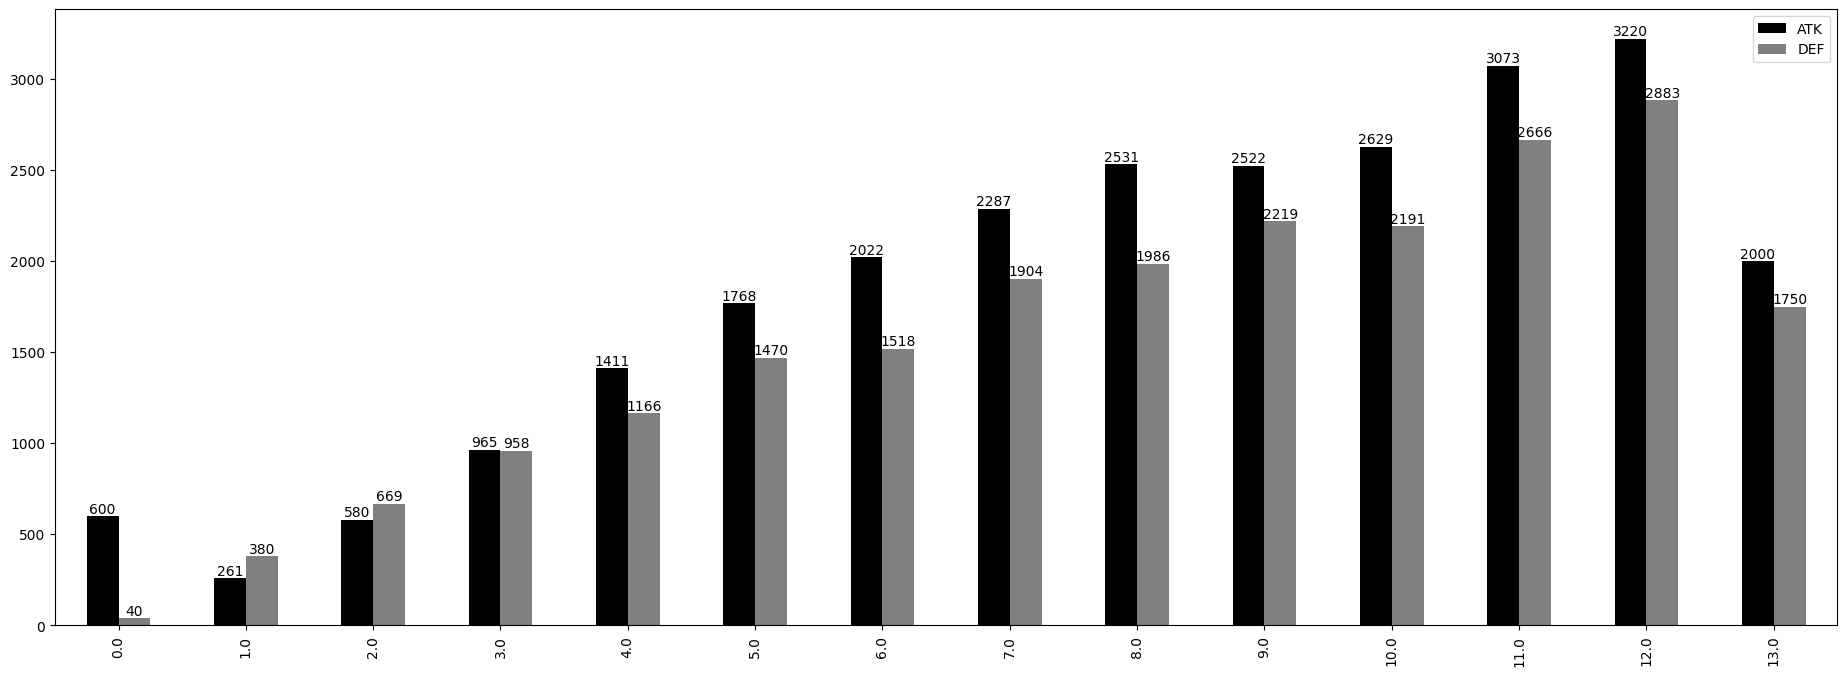

In [44]:
graf = monsters.groupby("level")[["ATK", "DEF"]].mean().plot.bar(figsize=(23, 8), color=("black", "gray"), xlabel="")
for container in graf.containers:
    graf.bar_label(container, fmt="%.0f")

Graf prikazuje razmerje med ATK in DEF pri različnih pošastih še na malo drugačen način.

<Axes: title={'center': 'Razmerje med ATK in DEF'}, xlabel='ATK', ylabel='DEF'>

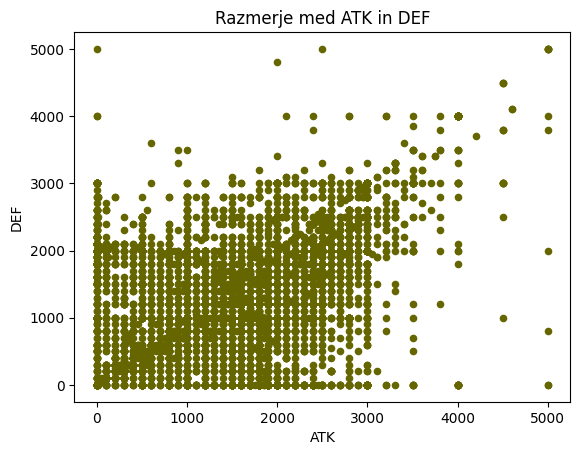

In [7]:
pošasti = monsters[monsters["DEF"] < 10000]
#se veliko bolje vidi ker ima le 1 monster "DEF" 16 000
pošasti.plot.scatter(x="ATK", y="DEF", title="Razmerje med ATK in DEF", color="#666600")

Manjša tabela kjer je dodan stolpec z povprečjem ATK in DEF. Ker je v igri pomembno oboje je tako določena nova količina moč, s katero bo lažje operirati pri interpretaciji. V preglednici je viden le manjši izsek celotne tabele.

In [8]:
monsters["moč"] = (monsters["ATK"] + monsters["DEF"]) / 2
monsters[["ime", "ATK", "DEF", "moč"]]

,ime,ATK,DEF,moč
sifra,,,,
14261867,8-Claws Scorpion,300.0,200.0,250.0
4731783,"A Bao A Qu, the Lightless Shadow",2800.0,300.0,1550.0
51351302,A Man with Wdjat,1600.0,1600.0,1600.0
1966438,Abominable Unchained Soul,3000.0,1500.0,2250.0
60990740,Absolute King Back Jack,0.0,0.0,0.0
...,...,...,...,...
23740893,Yosenju Kodam,0.0,0.0,0.0
49249907,Yosenju Magat,2000.0,100.0,1050.0
25244515,Yosenju Tsujik,1000.0,0.0,500.0


Število pošasti, ki imajo ATK in DEF enak 0 je napisano tu spodaj. Tako potrdimo zgornjo trditev, da je govor o najnižjih številkah brezsmiselen.

In [9]:
monsters[(monsters["moč"]==0)]["ime"].count()

np.int64(304)

Graf prikazuje kako imajo različne pošasti različno moč glede na level. Za boljšo preglednost je izvzeta pošast z močjo več kot 8000, saj je edina s tako visoko močjo.

<Axes: xlabel='level', ylabel='moč'>

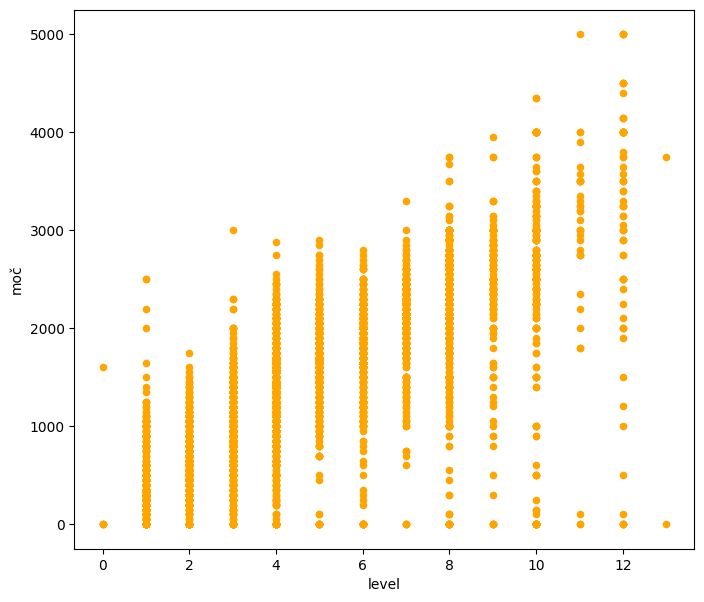

In [10]:
monsters[monsters["moč"] < 8000].plot.scatter(x="level", y="moč", figsize=(8, 7), color="orange")

Vizualna predstavitev dolžine efektov pošasti glede na njihovo moč.

<Axes: xlabel='dolzina efekta', ylabel='moč'>

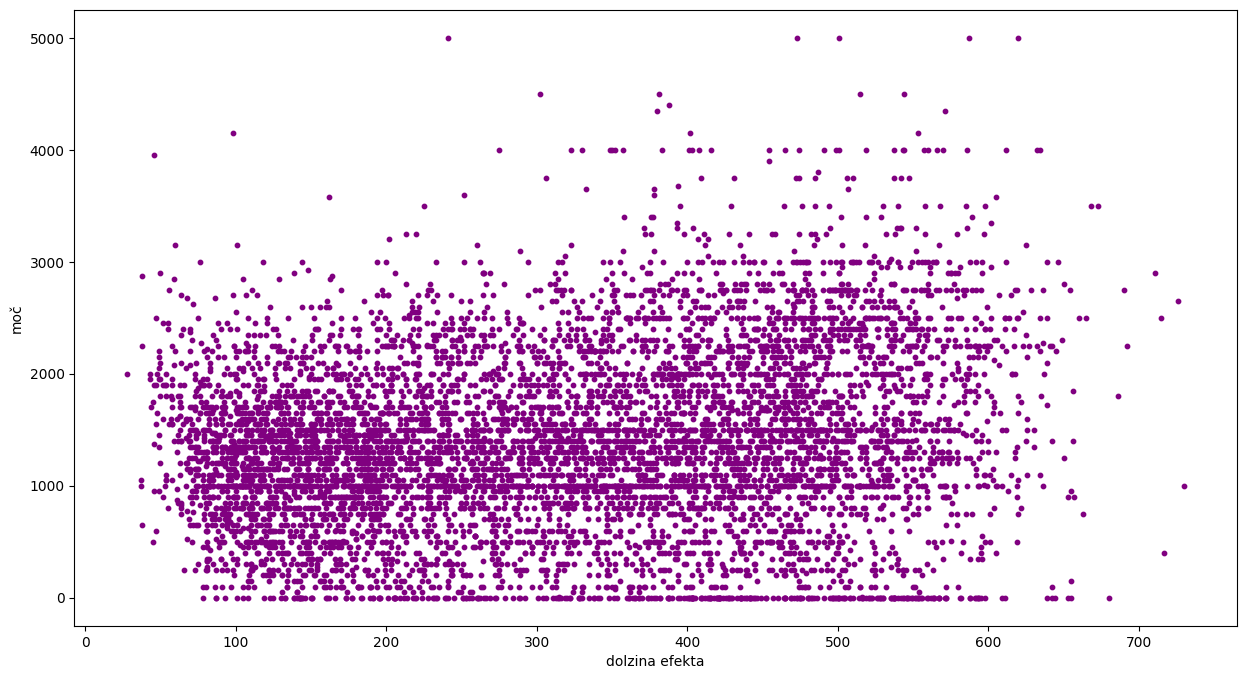

In [11]:
monsters["dolzina efekta"] = monsters["efekt"].str.len()
monsters[monsters["moč"] < 8000].plot.scatter(y="moč", x="dolzina efekta", figsize=(15, 8), color="purple", s=10)

Graf prikazuje koliko kart je katerega tipa med uroki in pastmi.

<Axes: >

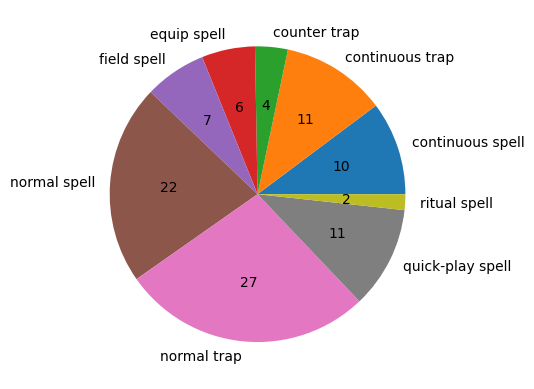

In [32]:
graf = spells_and_traps.groupby("tip")["ime"].count().plot.pie(ylabel="", autopct="%.0f")
graf

Tu so prikazane povprečne dolžine efektov pasti in urokov po tipih.

[Text(0, 0, '323'),
 Text(0, 0, '302'),
 Text(0, 0, '236'),
 Text(0, 0, '260'),
 Text(0, 0, '376'),
 Text(0, 0, '247'),
 Text(0, 0, '252'),
 Text(0, 0, '297'),
 Text(0, 0, '320')]

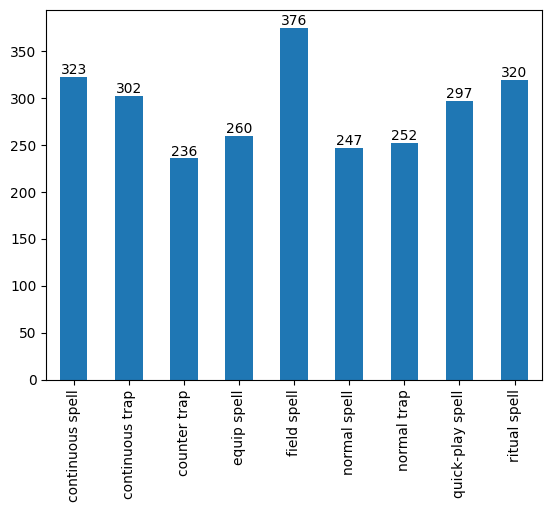

In [71]:
spells_and_traps["dolzina efekta"] = spells_and_traps["efekt"].str.len()
graf = spells_and_traps.groupby("tip")["dolzina efekta"].mean().plot.bar(y="dolzina efekta", xlabel="")
graf.bar_label(graf.containers[0], fmt="%.0f")

5 urokov in pasti z najdaljšim efektom.

In [14]:
spells_and_traps[["ime", "dolzina efekta", "tip"]].sort_values("dolzina efekta", ascending=False).head(5)

,ime,dolzina efekta,tip
sifra,,,
58116537,Ancient Warriors Saga - Sun-Liu Alliance,679,continuous spell
84274024,Pendulum Dimension,675,continuous trap
61529473,True Draco Apocalypse,670,continuous trap
43476205,Rank-Up-Magic Revolution Force,666,quick-play spell
72283691,Golden Castle of Stromberg,656,field spell


Tabela 5 pošasti z najdaljšimi efekti.

In [15]:
monsters[["ime", "dolzina efekta", "level", "moč", "tipi"]].sort_values("dolzina efekta", ascending=False).head(5)

,ime,dolzina efekta,level,moč,tipi
sifra,,,,,
24639891,Gunkan Suship Shari,730,4.0,1000.0,"Normal Monster,Aqua"
27552504,"Beatrice, Lady of the Eternal",726,6.0,2650.0,"Effect Monster,Fairy"
71187462,Blackwing - Vata the Emblem of Wandering,717,2.0,400.0,"Effect Monster,Winged Beast"
82791472,Ancient Warriors - Rebellious Lu Feng,715,8.0,2500.0,"Effect Monster,Beast-Warrior"
42901635,Berserkion the Electromagna Warrior,711,8.0,2900.0,"Effect Monster,Rock"


Pošasti z daljšimi efekti imajo očitno relativno nizko moč, kar kaže tudi spodnji graf. 

<Axes: >

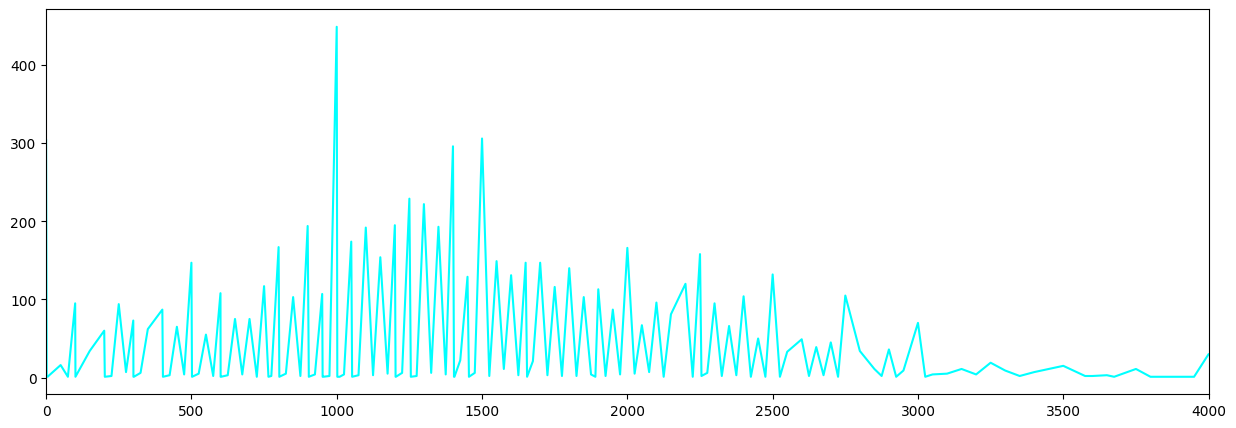

In [53]:
monsters.groupby("moč")["dolzina efekta"].count().plot.line(color="cyan", figsize=(15, 5), xlabel="", xlim=(0 ,4000))

Tabela prikazuje povprečno dolžino efekta pošasti glede na njen level.

In [52]:
monsters.groupby("level")["dolzina efekta"].mean().round()

level
0.0     561.0
1.0     326.0
2.0     284.0
3.0     277.0
4.0     289.0
5.0     317.0
6.0     313.0
7.0     356.0
8.0     388.0
9.0     410.0
10.0    450.0
11.0    468.0
12.0    464.0
13.0    548.0
Name: dolzina efekta, dtype: float64

To zaključi našo analizo. Hvala za ogled.